# Plotting the observation coverage from different BGC-Argo set-up in the North Atlantic 

In [1]:
from argopy import DataFetcher
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Initialize my data box
box = [-40, -10, 58, 65, 0, 5, '2013-01', '2026-01']

f = DataFetcher(ds='bgc', mode='expert', params='CHLA',
                parallel=True, progress=True, cache=False,
                chunks_maxsize={'time': 30},
               )
f = f.region(box).load()

ds = f.data

Final post-processing of the merged dataset ...


c:\Users\petit\miniconda3\envs\UVP6\Lib\site-packages\argopy\extensions\params_data_mode.py:117: FutureWarning: Note that the long name for institution is now in 'institution_name' while the 'institution' column will hold the institution code -- Deprecated since version 1.4
  df = idx.to_dataframe(completed=False)
c:\Users\petit\miniconda3\envs\UVP6\Lib\site-packages\argopy\fetchers.py:795: FutureWarning: Note that the long name for institution is now in 'institution_name' while the 'institution' column will hold the institution code -- Deprecated since version 1.4
  df = idx.to_dataframe()


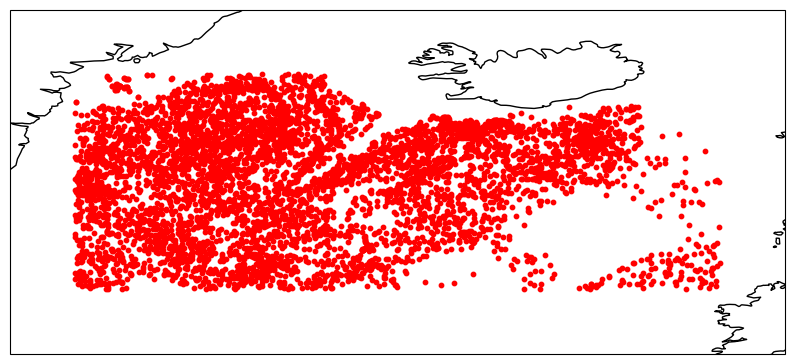

In [5]:
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract unique latitude and longitude pairs
unique_points = pd.DataFrame({
    'lat': ds.LATITUDE.values.flatten(),
    'lon': ds.LONGITUDE.values.flatten()
}).drop_duplicates()

lats = unique_points['lat']
lons = unique_points['lon']

# Calculate map boundaries
min_lon = lons.min() - 3
max_lon = lons.max() + 3
min_lat = lats.min() - 3
max_lat = lats.max() + 3

# Create the map
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Add coastline
ax.add_feature(cfeature.COASTLINE)

# Plot the points
ax.scatter(lons, lats, color='red', s=10, transform=ccrs.PlateCarree())

plt.show()

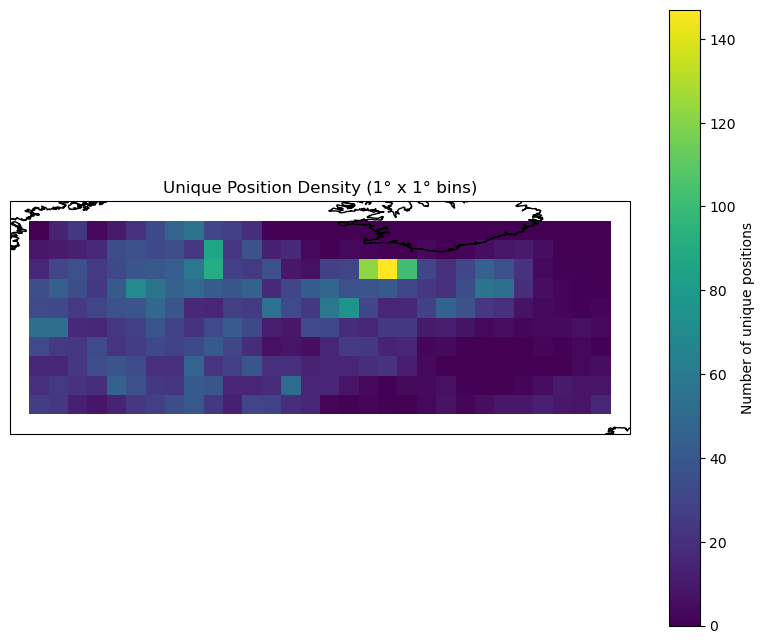

In [6]:
import numpy as np

# Use unique positions from cell 5
lats = unique_points['lat']
lons = unique_points['lon']

# Define 1-degree bins
lon_bins = np.arange(np.floor(lons.min()), np.ceil(lons.max()) + 1, 1)
lat_bins = np.arange(np.floor(lats.min()), np.ceil(lats.max()) + 1, 1)

# Compute 2D histogram (counts of unique positions in each 1x1 degree bin)
hist, lon_edges, lat_edges = np.histogram2d(lons, lats, bins=[lon_bins, lat_bins])

# Create the map
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lons.min() - 1, lons.max() + 1, lats.min() - 1, lats.max() + 1], crs=ccrs.PlateCarree())

# Add coastline
ax.add_feature(cfeature.COASTLINE)

# Plot the heatmap
mesh = ax.pcolormesh(lon_edges, lat_edges, hist.T, cmap='viridis', transform=ccrs.PlateCarree(), shading='flat')

# Add colorbar
plt.colorbar(mesh, ax=ax, label='Number of unique positions')

plt.title('Unique Position Density (1° x 1° bins)')
plt.show()

In [7]:

d = DataFetcher(ds='bgc', mode='expert', params='DOXY',
                parallel=True, progress=True, cache=False,
                chunks_maxsize={'time': 30},
               )
d = d.region(box).load()

doxy_ds = d.data

Final post-processing of the merged dataset ...


c:\Users\petit\miniconda3\envs\UVP6\Lib\site-packages\argopy\extensions\params_data_mode.py:117: FutureWarning: Note that the long name for institution is now in 'institution_name' while the 'institution' column will hold the institution code -- Deprecated since version 1.4
  df = idx.to_dataframe(completed=False)
c:\Users\petit\miniconda3\envs\UVP6\Lib\site-packages\argopy\fetchers.py:795: FutureWarning: Note that the long name for institution is now in 'institution_name' while the 'institution' column will hold the institution code -- Deprecated since version 1.4
  df = idx.to_dataframe()


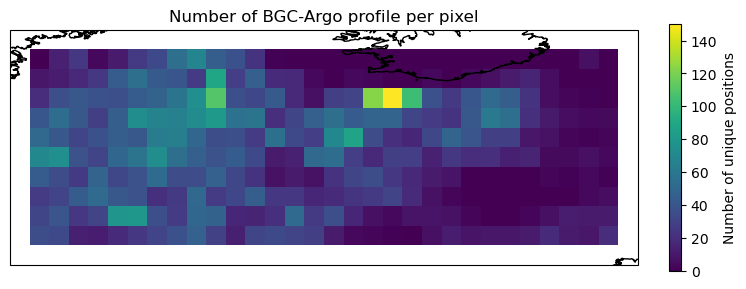

In [9]:
# Extract unique latitude and longitude pairs
unique_points = pd.DataFrame({
    'lat': doxy_ds.LATITUDE.values.flatten(),
    'lon': doxy_ds.LONGITUDE.values.flatten()
}).drop_duplicates()


# Use unique positions from cell 5
lats = unique_points['lat']
lons = unique_points['lon']

# Define 1-degree bins
lon_bins = np.arange(np.floor(lons.min()), np.ceil(lons.max()) + 1, 1)
lat_bins = np.arange(np.floor(lats.min()), np.ceil(lats.max()) + 1, 1)

# Compute 2D histogram (counts of unique positions in each 1x1 degree bin)
hist, lon_edges, lat_edges = np.histogram2d(lons, lats, bins=[lon_bins, lat_bins])

# Create the map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lons.min() - 1, lons.max() + 1, lats.min() - 1, lats.max() + 1], crs=ccrs.PlateCarree())

# Add coastline
ax.add_feature(cfeature.COASTLINE)

# Plot the heatmap
mesh = ax.pcolormesh(lon_edges, lat_edges, hist.T, cmap='viridis', transform=ccrs.PlateCarree(), shading='flat')

# Add colorbar
cbar = plt.colorbar(mesh, ax=ax, shrink=0.4, pad=0.04)
cbar.set_label('Number of unique positions')

plt.title('Number of BGC-Argo profile per pixel')
plt.show()

In [13]:

n = DataFetcher(ds='bgc', mode='expert', params='NITRATE',
                parallel=True, progress=True, cache=False,
                chunks_maxsize={'time': 30},
               )
n = n.region(box).load()

nitrate_ds = n.data

Final post-processing of the merged dataset ...


c:\Users\petit\miniconda3\envs\UVP6\Lib\site-packages\argopy\extensions\params_data_mode.py:117: FutureWarning: Note that the long name for institution is now in 'institution_name' while the 'institution' column will hold the institution code -- Deprecated since version 1.4
  df = idx.to_dataframe(completed=False)
c:\Users\petit\miniconda3\envs\UVP6\Lib\site-packages\argopy\fetchers.py:795: FutureWarning: Note that the long name for institution is now in 'institution_name' while the 'institution' column will hold the institution code -- Deprecated since version 1.4
  df = idx.to_dataframe()


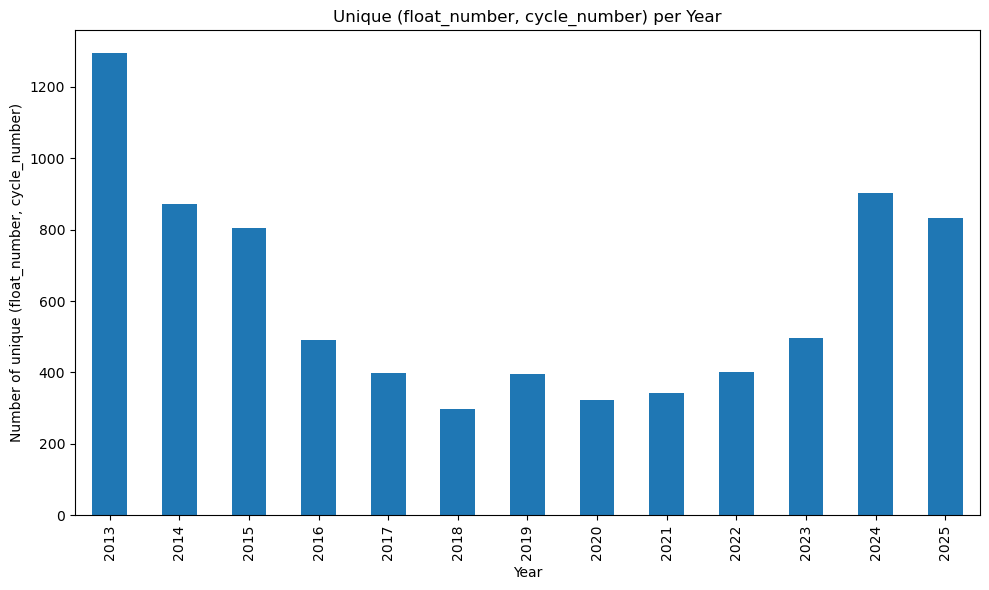

In [10]:
# Extract year from JULD, and get float_number and cycle_number
df = pd.DataFrame({
    'year': pd.to_datetime(doxy_ds.TIME.values.flatten()).year,
    'float_number': doxy_ds.PLATFORM_NUMBER.values.flatten(),
    'cycle_number': doxy_ds.CYCLE_NUMBER.values.flatten()
})

# Drop rows with missing values
df = df.dropna(subset=['year', 'float_number', 'cycle_number'])

# Count unique (float_number, cycle_number) per year
unique_counts = df.drop_duplicates(subset=['float_number', 'cycle_number', 'year']).groupby('year').size()

# Plot bar chart
unique_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of unique (float_number, cycle_number)')
plt.title('Unique (float_number, cycle_number) per Year')
plt.tight_layout()
plt.show()

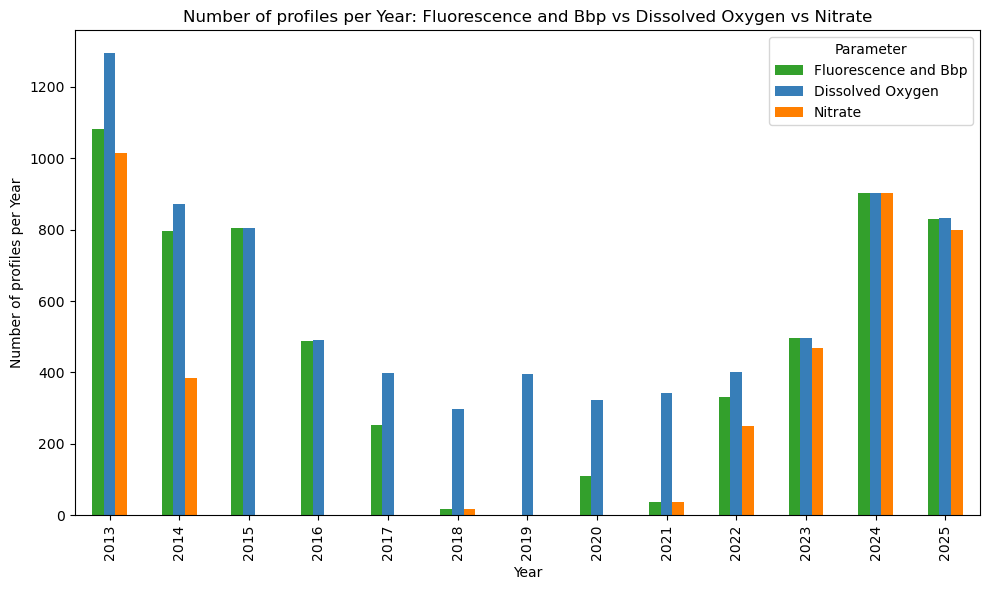

In [18]:
# Prepare data for ds (CHLA)
df_chla = pd.DataFrame({
    'year': pd.to_datetime(ds.TIME.values.flatten()).year,
    'float_number': ds.PLATFORM_NUMBER.values.flatten(),
    'cycle_number': ds.CYCLE_NUMBER.values.flatten()
})
df_chla = df_chla.dropna(subset=['year', 'float_number', 'cycle_number'])
unique_counts_chla = df_chla.drop_duplicates(subset=['float_number', 'cycle_number', 'year']).groupby('year').size()

# Prepare data for doxy_ds (DOXY)
df_doxy = pd.DataFrame({
    'year': pd.to_datetime(doxy_ds.TIME.values.flatten()).year,
    'float_number': doxy_ds.PLATFORM_NUMBER.values.flatten(),
    'cycle_number': doxy_ds.CYCLE_NUMBER.values.flatten()
})
df_doxy = df_doxy.dropna(subset=['year', 'float_number', 'cycle_number'])
unique_counts_doxy = df_doxy.drop_duplicates(subset=['float_number', 'cycle_number', 'year']).groupby('year').size()

#Prepare data for Nitrate
df_nitrate = pd.DataFrame({
    'year': pd.to_datetime(nitrate_ds.TIME.values.flatten()).year,
    'float_number': nitrate_ds.PLATFORM_NUMBER.values.flatten(),
    'cycle_number': nitrate_ds.CYCLE_NUMBER.values.flatten()
})
df_nitrate = df_nitrate.dropna(subset=['year', 'float_number', 'cycle_number'])
unique_counts_nitrate = df_nitrate.drop_duplicates(subset=['float_number', 'cycle_number', 'year']).groupby('year').size()
# Combine into a single DataFrame for plotting
df_compare = pd.DataFrame({
    'Fluorescence and Bbp': unique_counts_chla,
    'Dissolved Oxygen': unique_counts_doxy,
    'Nitrate': unique_counts_nitrate
}).fillna(0)

# Plot with specific colors
df_compare.plot(kind='bar', figsize=(10, 6), color=['#33a02c', '#377eb8', '#ff7f00'])
plt.xlabel('Year')
plt.ylabel('Number of profiles per Year')
plt.title('Number of profiles per Year: Fluorescence and Bbp vs Dissolved Oxygen vs Nitrate')
plt.legend(title='Parameter')
plt.tight_layout()
plt.show()

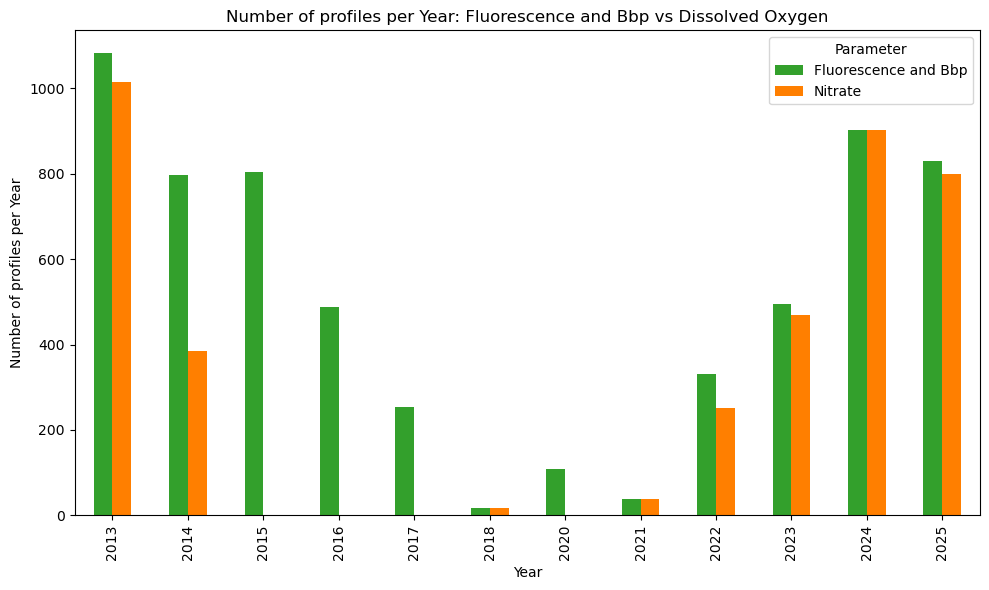

In [19]:
df_compare = pd.DataFrame({
    'Fluorescence and Bbp': unique_counts_chla,
    'Nitrate': unique_counts_nitrate
}).fillna(0)

# Plot
df_compare.plot(kind='bar', figsize=(10, 6), color=['#33a02c', '#ff7f00'])
plt.xlabel('Year')
plt.ylabel('Number of profiles per Year')
plt.title('Number of profiles per Year: Fluorescence and Bbp vs Dissolved Oxygen')
plt.legend(title='Parameter')
plt.tight_layout()
plt.show()

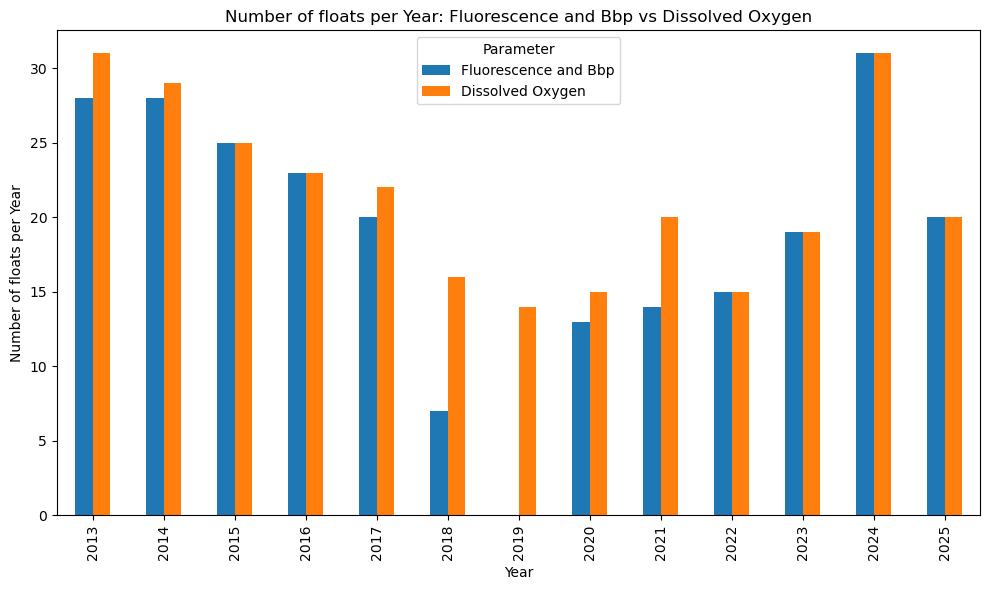

In [20]:
# Prepare data for ds (CHLA)
df_chla = pd.DataFrame({
    'year': pd.to_datetime(ds.TIME.values.flatten()).year,
    'float_number': ds.PLATFORM_NUMBER.values.flatten(),
    'cycle_number': ds.CYCLE_NUMBER.values.flatten()
})
df_chla = df_chla.dropna(subset=['year', 'float_number'])
unique_counts_chla = df_chla.drop_duplicates(subset=['float_number', 'year']).groupby('year').size()

# Prepare data for doxy_ds (DOXY)
df_doxy = pd.DataFrame({
    'year': pd.to_datetime(doxy_ds.TIME.values.flatten()).year,
    'float_number': doxy_ds.PLATFORM_NUMBER.values.flatten()
})
df_doxy = df_doxy.dropna(subset=['year', 'float_number'])
unique_counts_doxy = df_doxy.drop_duplicates(subset=['float_number', 'year']).groupby('year').size()

# Combine into a single DataFrame for plotting
df_compare = pd.DataFrame({
    'Fluorescence and Bbp': unique_counts_chla,
    'Dissolved Oxygen': unique_counts_doxy
}).fillna(0)

# Plot
df_compare.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of floats per Year')
plt.title('Number of floats per Year: Fluorescence and Bbp vs Dissolved Oxygen')
plt.legend(title='Parameter')
plt.tight_layout()
plt.show()